# Number of Housing Loans Distributed

For our third determinant of which of Pittsburgh's neighborhoods is the best,
we wanted to find out which neighborhood received the
most government funding through the Allegheny Loan Program. 
This would show us how much affordable housing is accessible in Pittsburgh neighborhoods.
The metric system that I created within the years of 2022-2024 focuses on the total amount of loans that each neighborhood 
within Allegheny County received and the average amount of loans among all 3 years  
that would offer for home improvement and renovation in each neighborhood.

Using the the dataset of information from the 'WPRDC' website called "ACED Allegheny Home Improvement Loan Program 2022-2024," I used Python to average how many each neighborhood got over the years and listed all
neighborhoods involved. I chose this loan program option because it incites the access to 
affordable housing that Pittsburgh distributes to its residents. It would show that Pittsburgh prioritizes
homelessness levels, the safety and convenience of families and people moving in, 
and the state Pittsburgh's local government is in, demonstrating Pittsburgh's ability to create a stronger and inclusive community.

For this reason, we used a data table from WPRDC's "https://data.wprdc.org/dataset/aced-allegheny-home-improvement-loan-program-ahilp" a data spreadsheet that was made on September 2022 containing a list of neighborhoods in and surrounding Pittsburgh.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("ahilp-loan-data-for-2022-thru-2024.csv")

# Step 1: get total loan amount per municipality (neighborhood) per year

yearly_totals = ( 
    df.groupby(['MUNICIPALITY', 'YEAR'])['TOTAL LOAN AMOUNT']
    .sum()
    .reset_index())

print("Below is the total loan money each muncipality (neighborhood) received per year in alphabetical order.")
display(yearly_totals.style.format({"TOTAL LOAN AMOUNT": "{:,.2f}"}))

# STEP 2: Get average total loan amount (2022-2024) per municipality

average_loans = (
    yearly_totals.groupby('MUNICIPALITY')['TOTAL LOAN AMOUNT']
    .mean()
    .reset_index(name='AVERAGE TOTAL LOAN AMOUNT (2022-2024)'))

average_loans = average_loans.sort_values(
    'AVERAGE TOTAL LOAN AMOUNT (2022-2024)', ascending=False)

print("Average loan money per municipality from highest to lowest (2022-2024):")
display(average_loans.style.format({"AVERAGE TOTAL LOAN AMOUNT (2022-2024)": "{:,.2f}"}))

Below is the total loan money each muncipality (neighborhood) received per year in alphabetical order.


,MUNICIPALITY,YEAR,TOTAL LOAN AMOUNT
0,ASPINWALL,2024,"23,500.00"
1,BALDWIN BOROUGH,2023,"25,459.00"
2,BALDWIN BOROUGH,2024,"22,500.00"
3,BALDWIN TWP,2022,"24,500.00"
4,BELLEVUE,2024,"9,300.00"
5,BEN AVON,2024,"13,900.00"
6,BETHEL PARK,2022,"16,796.00"
7,BETHEL PARK,2023,"10,467.50"
8,BETHEL PARK,2024,"66,000.00"
9,BLAWNOX,2024,"5,725.00"


Average loan money per municipality from highest to lowest (2022-2024):


,MUNICIPALITY,AVERAGE TOTAL LOAN AMOUNT (2022-2024)
28,PLUM,"66,120.00"
33,SHALER,"47,665.00"
29,PORT VUE,"32,700.00"
32,SCOTT,"31,135.00"
42,WILKINSBURG,"31,115.00"
5,BETHEL PARK,"31,087.83"
20,MONROEVILLE,"29,180.83"
39,WEST MIFFLIN,"29,069.65"
36,SWISSVALE,"26,500.00"
2,BALDWIN TWP,"24,500.00"


To summarize the neighborhoods that have been funded the most, 
I chose to create a graph
of the top 10 most financially supported neighborhoods. 

Taking into account how much
this can affect civilians, we determined that Plum Borough was 
the most supported,
most likely making it the the most habitable place for residents
for quality living.

# Graph

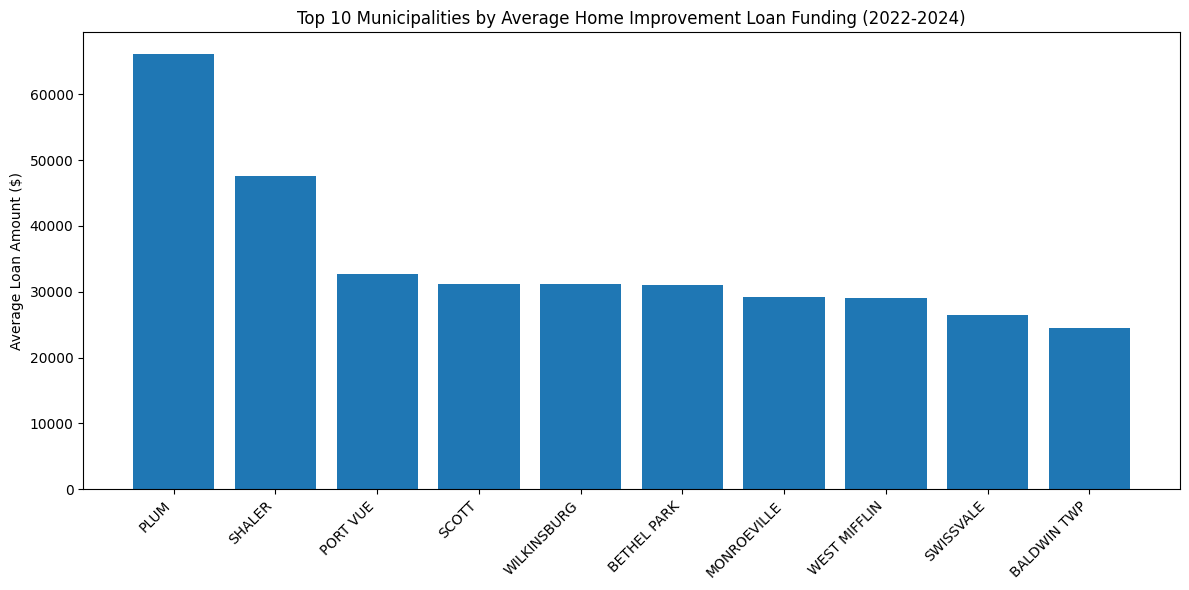

In [5]:
top10 = average_loans.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['MUNICIPALITY'], top10['AVERAGE TOTAL LOAN AMOUNT (2022-2024)'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Loan Amount ($)")
plt.title("Top 10 Municipalities by Average Home Improvement Loan Funding (2022-2024)")
plt.tight_layout()
plt.show()